#### import all requared lablaries

In [1]:
# inport all requared labraries
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

###### read_data fail

In [3]:
# read "zomato_pune_v002.csv data fail
data_file='zomato_pune_V002.csv'
zd=pd.read_csv(data_file)

In [4]:
zd.head()

,Restaurant_Name,Web_Link,Locality,Sponsored,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,Charges_for_two,payment_modes,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,AB's - Absolute Barbecues,https://www.zomato.com/pune/abs-absolute-barbe...,Hinjawadi,Casual Dining,4.9,7029 votes,+91 9373112211,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,1539.0
1,Cafe Co2 Resto Lounge,https://www.zomato.com/pune/cafe-co2-resto-lou...,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,080 46971866,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,139.0
2,Paasha - JW Marriott Pune,https://www.zomato.com/pune/paasha-jw-marriott...,Senapati Bapat Road,Fine Dining,4.6,3291 votes,080 46971369,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,119.0
3,I Amsterdam,https://www.zomato.com/pune/i-amsterdam-hinjawadi,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,+91 8669698666 +91 8669697666,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,8.0
4,FC Road Social,https://www.zomato.com/pune/fc-road-social-shi...,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,+91 9172378889 020 29805112,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",...,0,0,0,1,0,0,0,0,0,132.0


In [5]:
zd.info

<bound method DataFrame.info of                  Restaurant_Name  \
0      AB's - Absolute Barbecues   
1          Cafe Co2 Resto Lounge   
2      Paasha - JW Marriott Pune   
3                    I Amsterdam   
4                 FC Road Social   
...                          ...   
12184             Nil Food Point   
12185                Flirty Momo   
12186               Hunger Treat   
12187               Bungalow 424   
12188          Desi Shakes By KB   

                                                Web_Link             Locality  \
0      https://www.zomato.com/pune/abs-absolute-barbe...            Hinjawadi   
1      https://www.zomato.com/pune/cafe-co2-resto-lou...              Bhugaon   
2      https://www.zomato.com/pune/paasha-jw-marriott...  Senapati Bapat Road   
3      https://www.zomato.com/pune/i-amsterdam-hinjawadi            Hinjawadi   
4      https://www.zomato.com/pune/fc-road-social-shi...        Shivaji Nagar   
...                                              

In [6]:
zd.shape

(12189, 104)

In [7]:
zd.dtypes

Restaurant_Name       object
Web_Link              object
Locality              object
Sponsored             object
Ratings_out_of_5      object
                      ...   
Disabled Friendly      int64
Serves Halal           int64
Takeaway Only          int64
BYOB Only              int64
spam_review          float64
Length: 104, dtype: object

In [8]:
zd.describe

<bound method NDFrame.describe of                  Restaurant_Name  \
0      AB's - Absolute Barbecues   
1          Cafe Co2 Resto Lounge   
2      Paasha - JW Marriott Pune   
3                    I Amsterdam   
4                 FC Road Social   
...                          ...   
12184             Nil Food Point   
12185                Flirty Momo   
12186               Hunger Treat   
12187               Bungalow 424   
12188          Desi Shakes By KB   

                                                Web_Link             Locality  \
0      https://www.zomato.com/pune/abs-absolute-barbe...            Hinjawadi   
1      https://www.zomato.com/pune/cafe-co2-resto-lou...              Bhugaon   
2      https://www.zomato.com/pune/paasha-jw-marriott...  Senapati Bapat Road   
3      https://www.zomato.com/pune/i-amsterdam-hinjawadi            Hinjawadi   
4      https://www.zomato.com/pune/fc-road-social-shi...        Shivaji Nagar   
...                                            

#### exploaration data

In [9]:
zd['Locality'].unique()

array(['Hinjawadi', 'Bhugaon', 'Senapati Bapat Road', 'Shivaji Nagar',
       'Wakad', 'East Street', 'Yerawada', 'Bavdhan', 'Kalyani Nagar',
       'Narhe', 'Bund Garden Road', 'Viman Nagar', 'Magarpatta',
       'Deccan Gymkhana', 'Hadapsar', 'Baner', 'Sus', 'Shivapur',
       'Mundhwa', 'FC Road', 'Kothrud', 'Koregaon Park', 'Erandwane',
       'MG Road', 'Karve Nagar', 'Sadashiv Peth', 'Pune University',
       'JM Road', 'Dhole Patil Road', 'Camp Area', 'Pimple Saudagar',
       'Kharadi', 'Ravet', 'Aundh', 'Nigdi', 'Kondhwa', 'Swargate',
       'Katraj', 'Khadki', 'Salunkhe Vihar Road', 'Law College Road',
       'Pimple Nilakh', 'Pashan', 'Lonavala', 'NIBM Road', 'Balewadi',
       'Dange Chowk', 'SB Road - Aundh', 'Pimpri Chinchwad Area',
       'Wadgaon Sheri', 'Pimpri', 'Wanowrie Kondhwa Area', 'Chinchwad',
       'Chandan Nagar', 'Fatima Nagar', 'Budhwar Peth', 'Warje',
       'Wagholi', 'Akurdi', 'Bibvewadi', 'Rasta Peth', 'KP and Kalyani',
       'Sinhgad Road', 'Model Col

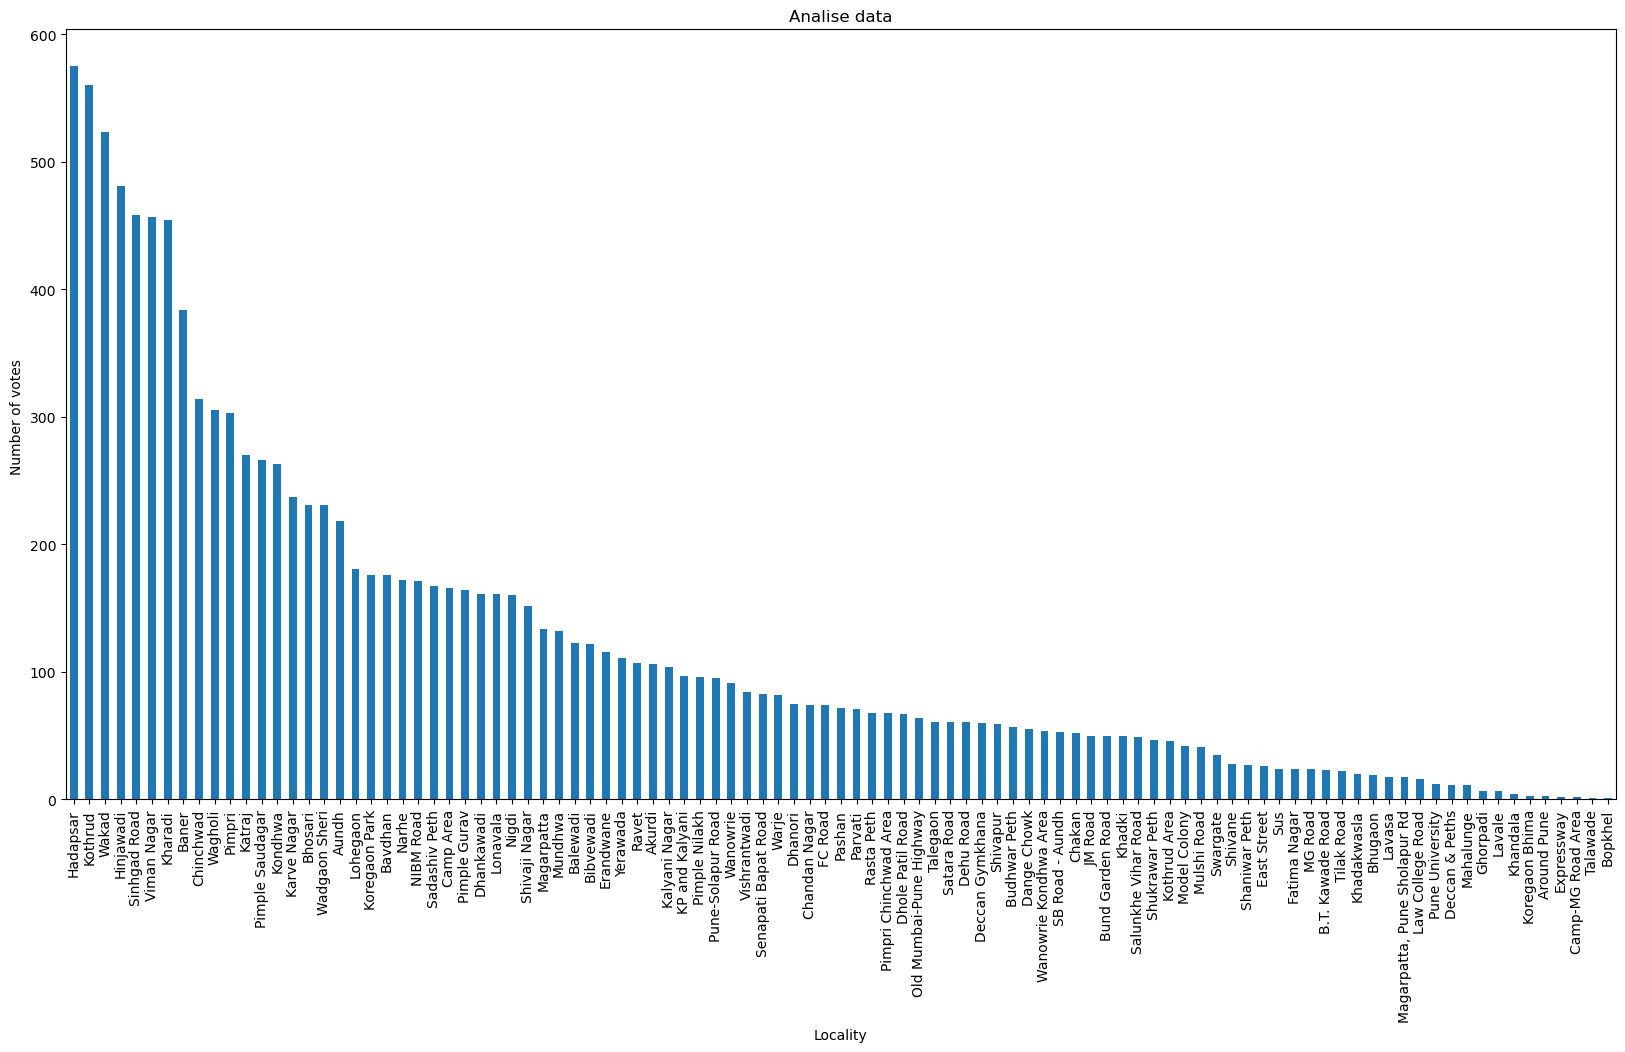

In [11]:
plt.figure(figsize=(20, 10))
zd['Locality'].value_counts().plot(kind='bar')
plt.xlabel('Locality')
plt.ylabel('Number of votes ')
plt.title('Analise data')
plt.show()

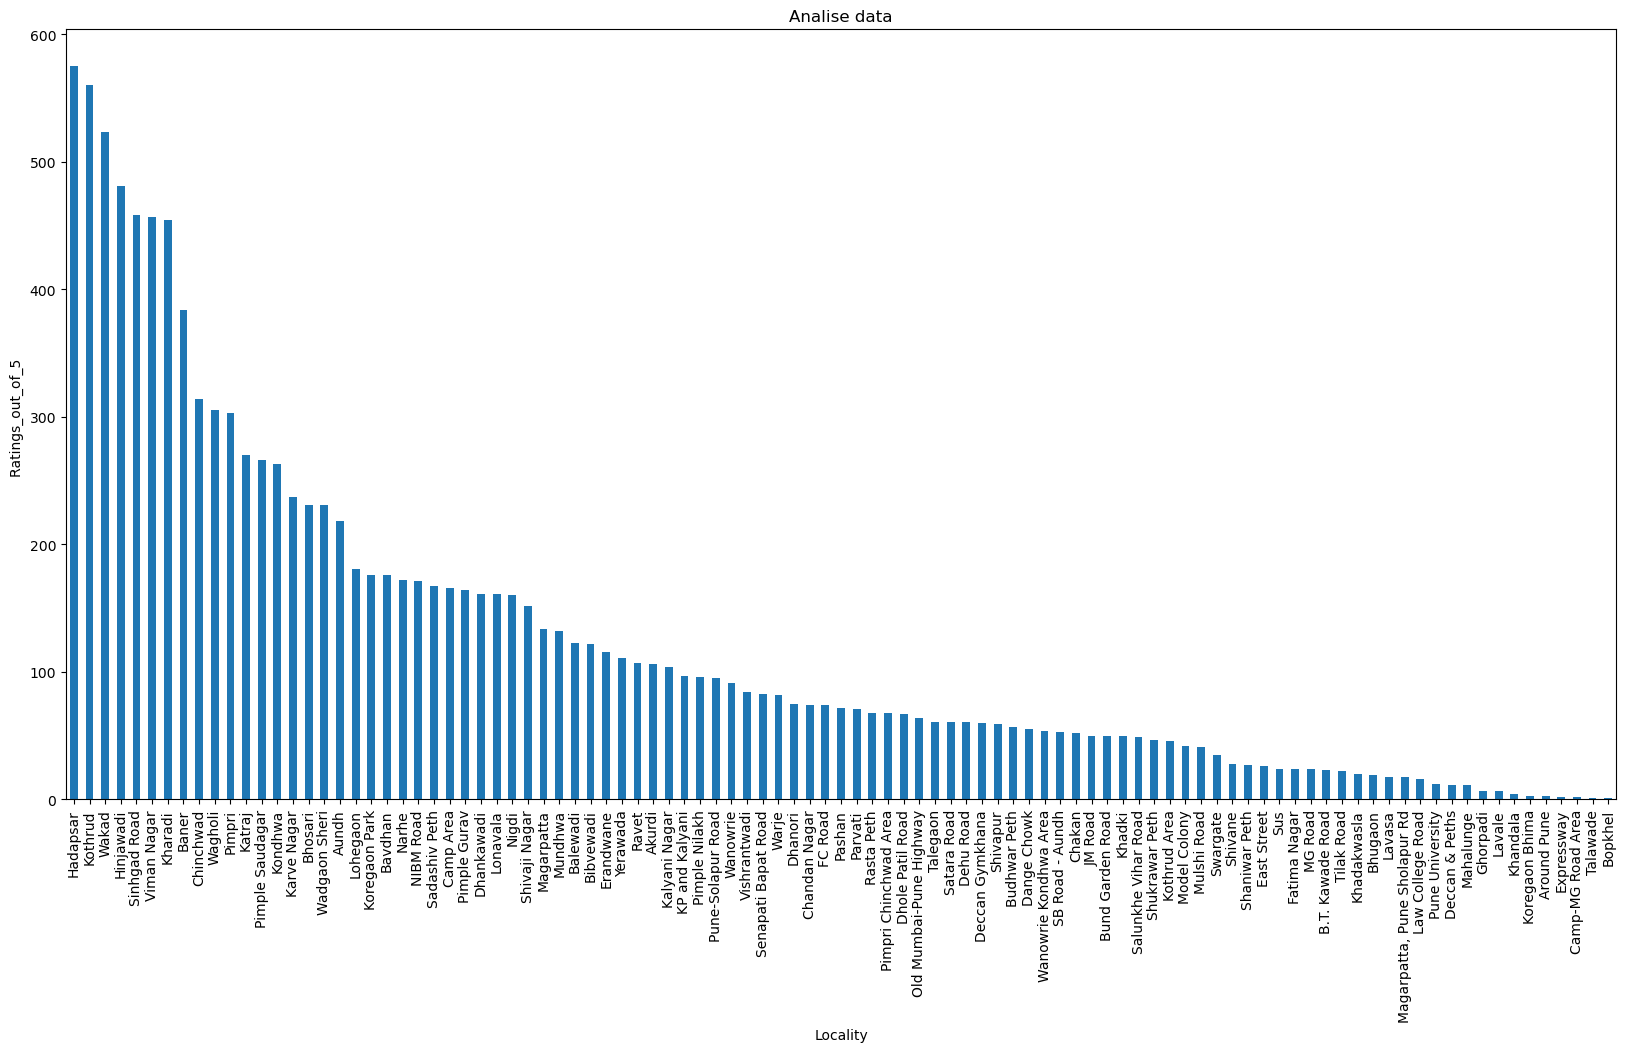

In [12]:
plt.figure(figsize=(20, 10))
zd['Locality'].value_counts().plot(kind='bar')
plt.xlabel('Locality')
plt.ylabel('Ratings_out_of_5 ')
plt.title('Analise data')
plt.show()

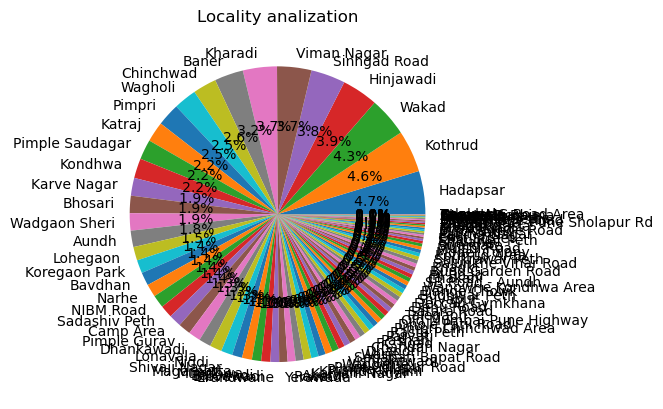

In [13]:
value_counts= zd['Locality'].value_counts()

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%6.1f%%')

# Add a title to the chart
plt.title('Locality analization')

# Display the chart
plt.show()


<Axes: >

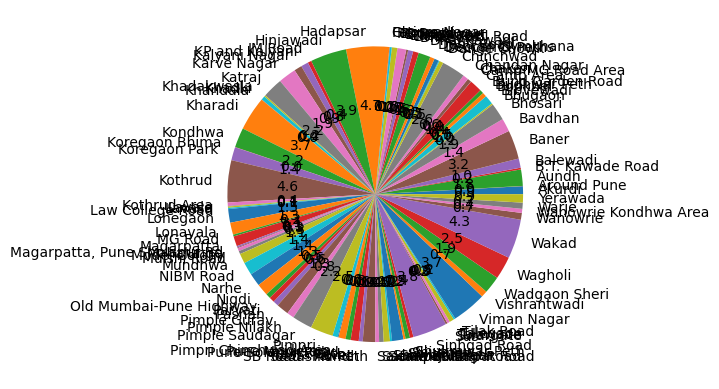

In [14]:
zd.groupby('Locality').size().plot(kind='pie', autopct='%.1f')

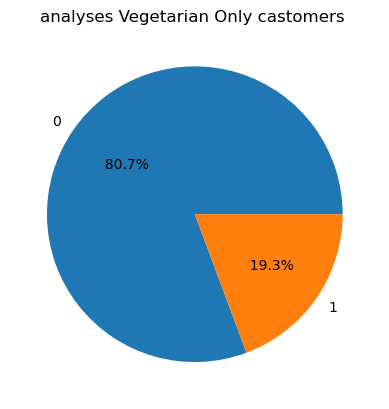

In [15]:
value_counts= zd['Vegetarian Only'].value_counts()

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%6.1f%%')

# Add a title to the chart
plt.title('analyses Vegetarian Only castomers ')

# Display the chart
plt.show()


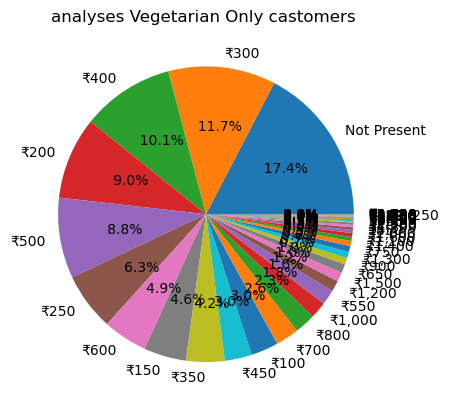

In [16]:
value_counts= zd['Charges_for_two'].value_counts()

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%6.1f%%')

# Add a title to the chart
plt.title('analyses Vegetarian Only castomers ')

# Display the chart
plt.show()

In [17]:
# drop phone number
zd=zd.drop(["Phone_number"],1)

C:\Users\HP\AppData\Local\Temp\ipykernel_14652\2882725564.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  zd=zd.drop(["Phone_number"],1)


In [18]:
zd.shape

(12189, 103)

In [19]:
# drop web_link
zd=zd.drop(["Web_Link"],1)

C:\Users\HP\AppData\Local\Temp\ipykernel_14652\1770771019.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  zd=zd.drop(["Web_Link"],1)


In [20]:
zd.dtypes

Restaurant_Name       object
Locality              object
Sponsored             object
Ratings_out_of_5      object
Number of votes       object
                      ...   
Disabled Friendly      int64
Serves Halal           int64
Takeaway Only          int64
BYOB Only              int64
spam_review          float64
Length: 102, dtype: object

In [21]:
# catagirical data converted into numarical
zd["Ratings_out_of_5"]=pd.to_numeric(zd["Ratings_out_of_5"],errors="coerce")

In [22]:
zd.dtypes

Restaurant_Name       object
Locality              object
Sponsored             object
Ratings_out_of_5     float64
Number of votes       object
                      ...   
Disabled Friendly      int64
Serves Halal           int64
Takeaway Only          int64
BYOB Only              int64
spam_review          float64
Length: 102, dtype: object

In [23]:
# drop Restaurant_Name
zd=zd.drop(["Restaurant_Name"],1)

C:\Users\HP\AppData\Local\Temp\ipykernel_14652\1302913333.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  zd=zd.drop(["Restaurant_Name"],1)


In [24]:
zd.dtypes

Locality              object
Sponsored             object
Ratings_out_of_5     float64
Number of votes       object
Cuisines              object
                      ...   
Disabled Friendly      int64
Serves Halal           int64
Takeaway Only          int64
BYOB Only              int64
spam_review          float64
Length: 101, dtype: object

In [25]:
# drop Detail_address
zd=zd.drop(["Detail_address"],1)

C:\Users\HP\AppData\Local\Temp\ipykernel_14652\3952263018.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  zd=zd.drop(["Detail_address"],1)


In [26]:
# drop Detail_address
zd=zd.drop(["Rest_timming"],1)

C:\Users\HP\AppData\Local\Temp\ipykernel_14652\1220336.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  zd=zd.drop(["Rest_timming"],1)


In [27]:
zd.dtypes

Locality              object
Sponsored             object
Ratings_out_of_5     float64
Number of votes       object
Cuisines              object
                      ...   
Disabled Friendly      int64
Serves Halal           int64
Takeaway Only          int64
BYOB Only              int64
spam_review          float64
Length: 99, dtype: object

In [28]:
# catagirical data converted into numarical
zd["Number of votes"]=pd.to_numeric(zd["Number of votes"],errors="coerce")

In [29]:
zd.dtypes

Locality              object
Sponsored             object
Ratings_out_of_5     float64
Number of votes      float64
Cuisines              object
                      ...   
Disabled Friendly      int64
Serves Halal           int64
Takeaway Only          int64
BYOB Only              int64
spam_review          float64
Length: 99, dtype: object

In [30]:
zd.isnull().sum()


Locality                0
Sponsored               0
Ratings_out_of_5     3269
Number of votes      7695
Cuisines                0
                     ... 
Disabled Friendly       0
Serves Halal            0
Takeaway Only           0
BYOB Only               0
spam_review             0
Length: 99, dtype: int64

In [31]:
zd.dropna(axis=0,inplace=True)

In [32]:
zd.isnull().sum()

Locality             0
Sponsored            0
Ratings_out_of_5     0
Number of votes      0
Cuisines             0
                    ..
Disabled Friendly    0
Serves Halal         0
Takeaway Only        0
BYOB Only            0
spam_review          0
Length: 99, dtype: int64